<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Ice-age dynamics: 3. Dating
## Radioactive decay
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we use the equations on radioactive decay and decay series derived in the lecture
and play with `python` to plot the decay time series.

We first initialize the `python` libraries.

In [1]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

## Single decay

The solution to the differential equations for *parent*- and *daugther*-isotopes, $P(t)$ and $D(t)$, read:
$$
\begin{array}{rcl}
P(t) & = & P_0 e^{\displaystyle - \lambda t} \\
D(t) & = & P_0 \left( 1 - e^{\displaystyle - \lambda t} \right)
\end{array}
$$

Here, $t$ [s] is time, and $\lambda$ [1/s] the *decay constant*. Often, a more illustrative term is
the *half-live* $t_{1/2}$ [s], which is defined as:
$$
t_{1/2} = {{\ln 2} \over {\lambda}}
$$

Below, we will start plotting **single decay** as defined above with `python`. We define time as an `array`,
in our case starting from $t_1=0$ to $t_2=20$, units could be days for example. We discretise this interval
$[0,20]$ into 51 points, using the `linspace` command.

Next, we calculate both the parent $p1$ and daughter $d1$ isotope functions (see above) for a defined half-live
$t_{1/2}$.

Finally, we plot the two time series with `matplotlib`. 
Play with the different commands and change the plot layout!

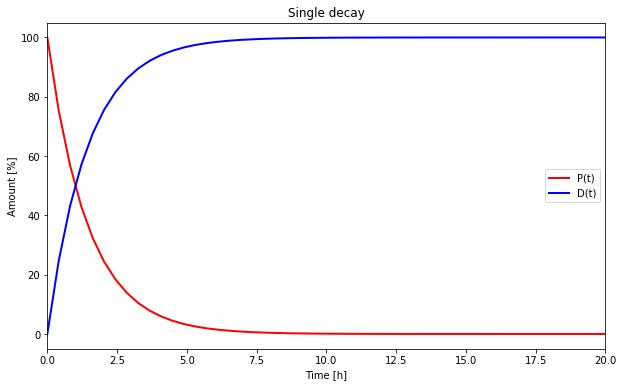

In [2]:
# define half-live
thalf = 1.
# define time series as array
t = np.linspace(0,20, num=50)
# calculate parent and daughter isotope time series
p1 = 100*np.e**(-np.log(2)*t/thalf)
d1 = 100*(1-np.e**(-np.log(2)*t/thalf))

#  plot
plt.figure(figsize=(10.0, 6.0))
plt.title('Single decay')
plt.xlim([0,20])
plt.xlabel('Time [h]')
plt.ylim([-5,105])
plt.ylabel('Amount [%]')
plt.plot(t,p1,linewidth=2,color='red',label='P(t)')
plt.plot(t,d1,linewidth=2,color='blue',label='D(t)')
plt.legend(loc='center right')
plt.show()

As a next step, we move the calculation and the graphics from the cell above into a function, which
we then can call, whenever we want:

In [3]:
def n1n2(thalf=1.):
    # define time series as array
    t = np.linspace(0,20, num=50)
    # calculate parent and daughter isotope time series
    p1 = 100*np.e**(-np.log(2)*t/thalf)
    d1 = 100*(1-np.e**(-np.log(2)*t/thalf))
    # call plotting functions
    plt.figure(figsize=(10.0, 6.0))
    plt.title('Single decay')
    plt.xlim([0,20])
    plt.xlabel('Time [h]')
    plt.ylim([-5,105])
    plt.ylabel('Amount [%]')
    plt.plot(t,p1,linewidth=2,color='red',label='P(t)')
    plt.plot(t,d1,linewidth=2,color='blue',label='D(t)')
    plt.legend(loc='center right')
    plt.show()

Check the function`n1n2`by calling it in a cell, changing the half-live:

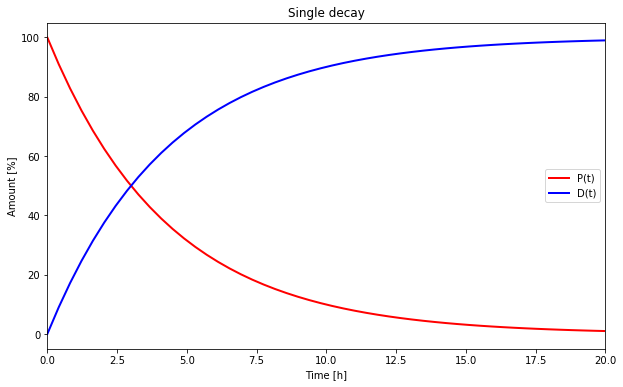

In [6]:
n1n2(3)

Last step, becoming a bit more interactive with the `ipywidgets` package, which we imported above.
We define the half-live as slider, which will be shown alonside the plot.

In [7]:
# call interactive module
w = dict(
thalf=widgets.FloatSlider(min=0.1,max=10.0,step=0.1,value=1.00,description='$t_{1/2}$'))

output = widgets.interactive_output(n1n2, w)
box = widgets.HBox([widgets.VBox([*w.values()]), output])
display(box)

Now, we move on the the **decay series**, thus implementing three time series, and two sliders, in one go.

## Decay series

The solutions to the differential equations for *parent*- and *daugther*-isotopes, $P(t)$ and $D(t)$, read:
$$
\begin{array}{rcl}
P_1(t) & = & P_1^0 e^{\displaystyle -\lambda_1 t} \\
P_2(t) & = & \frac{\displaystyle \lambda_1}{\displaystyle \lambda_1 - \lambda_2} P_1^0 \left( e^{\displaystyle -\lambda_1 t} - e^{\displaystyle -\lambda_2 t} \right)
            + P_2^0 e^{\displaystyle -\lambda_2 t} \\
D(t) & = & P_1^0 \left( 1 
                     - \frac{\displaystyle \lambda_2}{\displaystyle \lambda_2 - \lambda_1} e^{\displaystyle -\lambda_1 t} 
                     - \frac{\displaystyle \lambda_1}{\displaystyle \lambda_1 - \lambda_2} e^{\displaystyle -\lambda_2 t}
                \right)
\end{array}
$$

In [9]:
def n1n2n3(thalf1,thalf2):
    # define solutions for parent and daughter isotopes
    lambda1 = np.log(2)/thalf1
    lambda2 = np.log(2)/thalf2
    if (lambda1 == lambda2):
        lambda2 = 0.99*lambda2
    t = np.linspace(0,20, num=50)
    n1 = 100*np.e**(-lambda1*t)
    n2 = 100*lambda1/(lambda2-lambda1)*(np.e**(-lambda1*t) - np.e**(-lambda2*t))
    n3 = 100*(1 - lambda2/(lambda2-lambda1)*np.e**(-lambda1*t) - lambda1/(lambda1-lambda2)*np.e**(-lambda2*t))
    # call plotting functions
    plt.figure(figsize=(10.0, 6.0))
    plt.title('Decay series')
    plt.xlim([0,20])
    plt.xlabel('Time [h]')
    plt.ylim([-5,105])
    plt.ylabel('Amount [%]')
    plt.plot(t,n1,linewidth=2,color='red',label='P$_1$(t)')
    plt.plot(t,n2,linewidth=2,color='green',label='P$_2$(t)')
    plt.plot(t,n3,linewidth=2,color='blue',label='P$_3$(t)')
    plt.legend(loc='center right')
    plt.show()
    
# call interactive module
w = dict(
thalf1=widgets.FloatSlider(min=0.1,max=10.0,step=0.1,value=1.00,description='$t^1_{1/2}$'),
thalf2=widgets.FloatSlider(min=0.1,max=10.0,step=0.1,value=7.00,description='$t^2_{1/2}$'))

output = widgets.interactive_output(n1n2n3, w)
box = widgets.HBox([widgets.VBox([*w.values()]), output])
display(box)

Note the two lines in the function `n1n2n3` commented out (the if clause). Try in the example above to set both half-lives to the same value. The program will crash, because for $t^1_{1/2}=t^2_{1/2}$, there will be a division through zero in the denominator (check the equations above!). We avoid this problem by checking, if this situation arises, then slightly changing one of the values (by 1%). 